In [1]:
!pip install InstructorEmbedding

## Import

In [113]:
from InstructorEmbedding import INSTRUCTOR
from langchain.document_loaders import PyPDFLoader
from sklearn.metrics.pairwise import cosine_similarity
import time

## Path

In [114]:
path_chap4 = ""
path_chap33 = ""

## Loading Documents

In [115]:
paths = [path_chap4, path_chap33]
loaders = []
for path in paths:
  loaders.append(PyPDFLoader(path))

In [116]:
document = []
for loader in loaders:
  document.extend(loader.load())

In [117]:
len(document)

26

In [118]:
type(document[1].page_content)

str

In [33]:
document[25].page_content

'956 Éléments de sûreté nucléaire\xa0–\xa0Les réacteurs à eau sous pression\nFigure 33.2.  Schéma cyclique dans l’approche par état. IRSN (source EDF).\n33.6. L’approche par états pour le réacteur EPR\nPour le réacteur EPR\xa0Flamanville\xa03, l’approche par états a été retenue dès la concep -\ntion des procédures de conduite incidentelle et accidentelle. Le guidage des opérateurs \n(« orientation et stabilisation  », voir plus haut) est toutefois automatisé.'

In [119]:
doc = []
domain = "Retrieving the nuclear reactor domain: "
for i in range(len(document)):
    firstpart, secondpart = document[i].page_content[:len(document[i].page_content)//2], document[i].page_content[len(document[i].page_content)//2:]
    if (len(firstpart) or len(secondpart) != 0):
        doc.append([domain, firstpart])
        doc.append([domain, secondpart])

In [120]:
doc

[['Retrieving the nuclear reactor domain: ',
  'Chapitre 4\nLes réacteurs nucléaires  :   \ndes systèmes sociotechniques \ncomplexes  – \nL ’importance des facteurs \norganisationnels et humains\nAvant de développer dans le présent ouvrage de manière plus approfondie les \nsujets de sûreté, plus spécifiquement pour les réacteurs à eau sous pression du parc \nélectronucléaire français, il apparaît nécessaire dès à présent de souligner l’impor-tance particulière que revêtent non seulement les aspects techniques mais aussi les facteurs organisationnels et humains  (FOH) dans la maîtrise des risques liés à de \ntelles installations.\nL’analyse des incidents e'],
 ['Retrieving the nuclear reactor domain: ',
  't des accidents (dans tous les domaines d’activité, pas \nseulement celui de l’industrie nucléaire) montre qu’ils sont le plus souvent le résultat de combinaisons de défaillances ou d’insuffisances concernant les matériels, les orga -\nnisations et les hommes.\nLa considération des se

## Load Instructor Model

In [121]:
model = INSTRUCTOR('hkunlp/instructor-xl')

load INSTRUCTOR_Transformer
max_seq_length  512


# How to write instructions

_Represent the **domain** **text_type** for **task_objective**_

**domain** : specifies the domain of the text (science, finance, medicine, etc.)

**text_type**: specifies the encoding unit  (sentence, document, paragraph, etc.)

**task_objective**: specifies the objective of embedding (retrieve a document, classify the sentence, etc.)

# Defining the research question

Prompt Testing with mulitple scenarios

## Queries

### - Control Query

In [65]:
query = [["Represent the nuclear reactor domain:",
          "Comment sont conduites les études organisationnelles et humaines sur le terrain ?"]]

### - Experimental Queries

In [122]:
query = [["Represent the nuclear reactor domain: ",
          "Quelle est l'influence de l'incident de mars 2002 ?"]]

In [62]:
query = [["Represent the nuclear reactor domain:",
          "Comment sont conduites les études organisationnelles et humaines sur le terrain ?"]]

In [164]:
query = [["Represent the nuclear reactor domain:",
          "Quelles sont les caractéritiques de l'état d'une installation ?"]]

In [165]:
print(query)


[['Represent the nuclear reactor domain:', "Quelles sont les caractéritiques de l'état d'une installation ?"]]


In [166]:
start = time.time()
query_embeddings = model.encode(query)
end = time.time()

In [167]:
print(end-start)

5.745929002761841


## Corpus

In [128]:
corpus = doc

In [129]:
start = time.time()
corpus_embeddings = model.encode(corpus)
end = time.time()

**TIME FOR CORPUS EMBEDDING**

In [130]:
print(end-start)

76.59469866752625


In [31]:
corpus_embeddings

array([[ 0.02775722,  0.05267641,  0.04015062, ..., -0.05866615,
         0.00846319,  0.04864185],
       [ 0.02527369,  0.04208843,  0.03759762, ..., -0.04908524,
         0.00619898,  0.06292736],
       [ 0.03775888,  0.04834661,  0.02864701, ..., -0.04704093,
         0.00470379,  0.06230151],
       ...,
       [-0.01687039,  0.03976665,  0.03239996, ..., -0.07296515,
         0.0076263 ,  0.04420543],
       [-0.01498506,  0.05285629,  0.04856495, ..., -0.05798703,
        -0.01108014,  0.01968489],
       [-0.00439278,  0.03293464,  0.06596583, ..., -0.05091678,
         0.02726727,  0.06183447]], dtype=float32)

# Cosine Similarity
*cosine_similarity* computes the L2-normalized dot product of vectors. That is, if 
 and 
 are row vectors, their cosine similarity 
 is defined as:
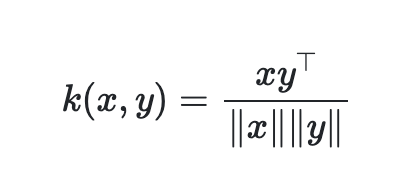
This is called cosine similarity, because Euclidean (L2) normalization projects the vectors onto the unit sphere, and their dot product is then the cosine of the angle between the points denoted by the vectors.

This kernel is a popular choice for computing the similarity of documents represented as tf-idf vectors.

In [168]:
start = time.time()
similarities = cosine_similarity(query_embeddings,corpus_embeddings)
end = time.time()

In [169]:
print(end-start)

0.02609395980834961


In [74]:
similarities

array([[0.7956069 , 0.7733009 , 0.8368037 , 0.7844873 , 0.7979003 ,
        0.8141267 , 0.78298306, 0.795355  , 0.768329  , 0.7626423 ,
        0.78499234, 0.7550276 , 0.74981713, 0.7709104 , 0.7702655 ,
        0.80745065, 0.7833276 , 0.80877495, 0.80755734, 0.77418613,
        0.81433684, 0.81045306, 0.86120445, 0.8159894 , 0.8151046 ,
        0.80410564, 0.773083  , 0.78561985, 0.75713   , 0.79542714,
        0.7533687 , 0.7464546 , 0.7254692 , 0.7637211 , 0.76558983,
        0.74105054, 0.74473196, 0.74000967, 0.72970796, 0.75152856,
        0.712331  , 0.71633506, 0.7571912 , 0.7637705 , 0.7653213 ,
        0.7410002 , 0.7473608 , 0.7778744 , 0.7157135 , 0.77793586]],
      dtype=float32)

# Select top-k vectors

### Top 5

In [170]:
index_max = np.argsort(similarities[0])[::-1]

In [171]:
index_max[:5]

array([36, 33, 44,  3, 34])

In [172]:
top_5 = similarities[0,index_max[:5]]

In [173]:
top_5

array([0.85904086, 0.83705264, 0.82347536, 0.8147657 , 0.8145888 ],
      dtype=float32)

### Min 5

In [142]:
index_min = np.argsort(similarities[0])

In [143]:
index_min[:5]

array([35, 48, 41, 40, 46])

In [144]:
min_5 = similarities[0,index_min[:5]]

In [145]:
min_5

array([0.6834934 , 0.68499565, 0.6982652 , 0.70805377, 0.71354616],
      dtype=float32)

# Cosine Distance
Cosine distance is defined as : 1 - (cosine similarity)

# MMR Score
MMR score = λ * relevance score - (1 - λ) * diversity score

# Plot

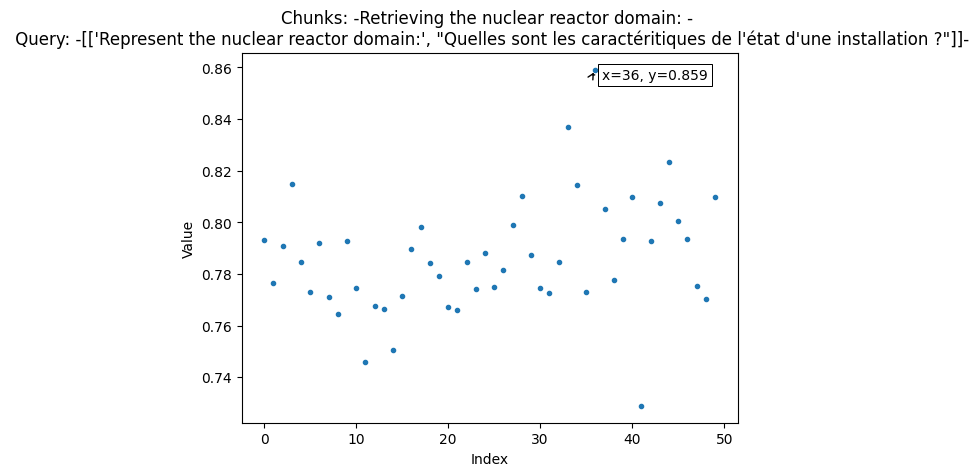

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

y = similarities[0]

x = range(len(y))

plt.scatter( x, y, marker='.')

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    
annot_max(x,y)


plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Chunks: -{}- \n Query: -{}-'.format(domain, query))
plt.show()

## TOP 5 Chunks Comparison

In [175]:
for chunk in index_max[:5]:
    print(query[0][1])
    print("CHUNK NUMBER ", chunk)
    print("------------------------")
    print(doc[chunk])
    print("---------------------------------------------------------------------")

Quelles sont les caractéritiques de l'état d'une installation ?
CHUNK NUMBER  36
------------------------
['Retrieving the nuclear reactor domain: ', '950 Éléments de sûreté nucléaire\xa0–\xa0Les réacteurs à eau sous pression\n secondaire, pressions de vapeur et niveaux de radioactivité éventuelle du \nfluide secondaire.\nÀ chaque état global ainsi défini sont associées des actions spécifiques sur les diffé -\nrents systèmes, en fonction de leur disponibilité (injection de sécurité, charge et décharge \nd’eau dans le circuit primaire, aspersion d’eau dans l’enceinte de confinement et décharge du pressuriseur, alimentation de secours en eau des générateurs de vapeur, décharge de vapeur d’eau par le circuit secondaire, isolement des lignes de vapeur et d’eau du circuit secondaire, etc.). Ces actions sont choisies en vue de stabiliser l’état de l’installation et si possible l’améliorer en progressant vers des états de moins en moins dégradés.\nD’un point de vue pratique, les paramètres ph

In [70]:
doc_id = np.argmax(similarities)

In [154]:
len(doc[11][0])

39